# Unit 5 - Financial Planning

In [16]:
# Initial imports
import os
import json
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [17]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [18]:
# Set current amount of crypto assets
my_btc = .7
my_eth = 2

In [19]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [20]:
#response_data = requests.get(btc_url).json
response_data_btc = requests.get(btc_url)
response_data_btc
response_content_btc = response_data_btc.content
response_content_btc
data_btc = response_data_btc.json()
import json
print(json.dumps(data_btc, indent=4))
response_data_eth = requests.get(eth_url)
response_content_eth = response_data_eth.content
data_eth = response_data_eth.json()
import json
print(json.dumps(data_eth, indent=4))

{
    "data": {
        "1": {
            "id": 1,
            "name": "Bitcoin",
            "symbol": "BTC",
            "website_slug": "bitcoin",
            "rank": 1,
            "circulating_supply": 18845787,
            "total_supply": 18845787,
            "max_supply": 21000000,
            "quotes": {
                "USD": {
                    "price": 61355.0,
                    "volume_24h": 34462059195,
                    "market_cap": 1156723286033,
                    "percentage_change_1h": 0.164961973277521,
                    "percentage_change_24h": -0.764753268952925,
                    "percentage_change_7d": 11.2999066976088,
                    "percent_change_1h": 0.164961973277521,
                    "percent_change_24h": -0.764753268952925,
                    "percent_change_7d": 11.2999066976088
                },
                "CAD": {
                    "price": 75939.0835,
                    "volume_24h": 42653690665.6515,
                  

In [21]:
# Fetch current prices
# Compute current value of my crpto
btc_value = data_btc["data"]["1"]["quotes"]["USD"]["price"]
my_btc_value = my_btc * btc_value
eth_value = data_eth["data"]["1027"]["quotes"]["USD"]["price"]
my_eth_value = my_eth * eth_value
# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 0.7 BTC is $42948.50
The current value of your 2 ETH is $7740.58


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [28]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [29]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")
# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2")

In [39]:
# Format current date as ISO format
today = pd.Timestamp("2021-10-16", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
df_portfolio = alpaca.get_barset(tickers, timeframe, end=today, limit=1000).df.sort_index(ascending=False)

# Preview DataFrame
df_portfolio.head()

AGG                                         \
                             open      high      low    close     volume   
time                                                                       
2021-10-15 00:00:00-04:00  114.61  114.6300  114.510  114.560  3829388.0   
2021-10-14 00:00:00-04:00  114.70  114.8496  114.630  114.840  3540673.0   
2021-10-13 00:00:00-04:00  114.43  114.6400  114.415  114.610  5301180.0   
2021-10-12 00:00:00-04:00  114.17  114.3800  114.110  114.355  3521504.0   
2021-10-11 00:00:00-04:00  114.01  114.0650  113.940  113.940  1999518.0   

                              SPY                                      
                             open    high     low   close      volume  
time                                                                   
2021-10-15 00:00:00-04:00  444.76  446.26  444.09  445.83  55980388.0  
2021-10-14 00:00:00-04:00  439.08  442.66  438.58  442.47  59812568.0  
2021-10-13 00:00:00-04:00  434.71  436.05  431.54  435.13  63943229.0  
2021-10-12 00:00:00-04:00  435.67  436.10  432.78  433.63  61078594.0  
2021-10-11 00:00:00-04:00  437.16  440.26  434.62  434.67  54993389.0

In [40]:
# Pick AGG and SPY close prices
agg_close_price = df_portfolio["AGG"]["close"][0]
spy_close_price = df_portfolio["SPY"]["close"][0]
agg_close_price

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $114.56
Current SPY closing price: $445.83


In [42]:
# Compute the current value of shares
my_agg_value = my_agg * agg_close_price
my_spy_value = my_spy * spy_close_price

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $22291.50
The current value of your 200 AGG shares is $22912.00


### Savings Health Analysis

In [43]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
# Consolidate crypto holdings
crypto = my_btc_value + my_eth_value

# Consolidate equity holdings
shares = my_agg_value + my_spy_value

# Create list for creation of savings DataFrame
savings = [crypto, shares]

# Create savings DataFrame
df_savings = pd.DataFrame(savings, index=["crypto", "shares"], columns=["amount"])

# Display savings DataFrame
display(df_savings)

,amount
crypto,50689.08
shares,45203.50


<AxesSubplot:title={'center':'Composition of Personal Savings'}, ylabel='amount'>

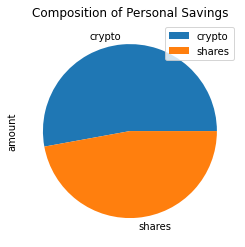

In [44]:
# Plot savings pie chart
df_savings.plot.pie(y="amount", title="Composition of Personal Savings")

In [46]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = float(df_savings.sum())

# Validate saving health
if total_savings > emergency_fund:
    print("Congratulations! You've raised more than enough for your emergency fund!")
elif total_savings == emergency_fund:
    print("Congratulations! You've met your emergency fund savings goal!")
else:
    print(f"You are ${(emergency_fund - total_savings):0.2f} away from your emergency fund savings goal. Let's keep saving!")

Congratulations! You've raised more than enough for your emergency fund!


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [48]:
# Get 5 years' worth of historical data for SPY and AGG
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [49]:
# Get 5 years' worth of historical data for SPY and AGG
tickers = ["AGG","SPY"]
df_stock_data = alpaca.get_barset(tickers, timeframe, start=start_date, end=end_date, limit=1000).df
# Drop the time component of the date
df_stock_data.index = df_stock_data.index.date
# Display sample data
df_stock_data.head()

AGG                                            SPY          \
              open     high       low    close     volume    open    high   
2017-05-10  108.60  108.660  108.4400  108.520  1427511.0     NaN     NaN   
2017-05-11  108.35  108.540  108.3435  108.515  1773499.0  239.35  239.57   
2017-05-12  108.81  108.940  108.7800  108.920  1136553.0  239.09  239.21   
2017-05-15  108.85  108.940  108.8200  108.890  1620264.0  239.47  240.44   
2017-05-16  108.88  109.101  108.8800  109.000  1394153.0  240.62  240.67   

                                         
               low    close      volume  
2017-05-10     NaN      NaN         NaN  
2017-05-11  238.13  239.410  45435690.0  
2017-05-12  238.67  239.030  35283567.0  
2017-05-15  239.45  240.245  42230620.0  
2017-05-16  239.63  240.100  37206183.0

In [51]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_30yr = MCSimulation(
    portfolio_data=df_stock_data,
    weights=[.40, .60],
    num_simulation=500,
    num_trading_days=252*30
)

In [52]:
# Printing the simulation input data
MC_even_dist.portfolio_data.head()

AGG                                                      \
              open     high       low    close     volume daily_return   
2017-05-10  108.60  108.660  108.4400  108.520  1427511.0          NaN   
2017-05-11  108.35  108.540  108.3435  108.515  1773499.0    -0.000046   
2017-05-12  108.81  108.940  108.7800  108.920  1136553.0     0.003732   
2017-05-15  108.85  108.940  108.8200  108.890  1620264.0    -0.000275   
2017-05-16  108.88  109.101  108.8800  109.000  1394153.0     0.001010   

               SPY                                                    
              open    high     low    close      volume daily_return  
2017-05-10     NaN     NaN     NaN      NaN         NaN          NaN  
2017-05-11  239.35  239.57  238.13  239.410  45435690.0          NaN  
2017-05-12  239.09  239.21  238.67  239.030  35283567.0    -0.001587  
2017-05-15  239.47  240.44  239.45  240.245  42230620.0     0.005083  
2017-05-16  240.62  240.67  239.63  240.100  37206183.0    -0.000604

In [53]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_even_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.000283,1.004993,1.008666,1.000530,1.006616,0.995013,0.998277,1.000238,0.999298,1.006923,...,0.995206,1.007060,0.988766,1.014448,1.001872,1.001682,0.996360,1.012185,1.001900,1.000299
2,0.989393,1.013237,1.019060,0.997410,1.013663,0.996421,0.980057,1.002970,1.000969,1.012673,...,1.000311,0.996716,1.000607,1.019030,0.999541,0.996906,0.999670,1.006493,1.008739,1.005006
3,0.999600,1.021031,1.020922,0.994534,1.007007,0.998479,0.980061,0.997849,0.985589,1.007146,...,0.989159,1.001824,0.995404,1.026024,1.013392,1.008727,0.986573,1.010152,0.998756,1.000940
4,0.985878,1.036438,1.015682,0.999607,1.009429,0.986130,0.988245,0.979884,0.984709,1.004560,...,0.994438,0.984628,0.980494,1.019438,1.030865,1.015845,0.982496,1.017408,0.986237,1.007174
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,64.967588,5.379103,78.081124,4.033236,6.885647,30.469836,46.268085,80.663909,6.904193,18.873070,...,15.457996,6.362291,29.670661,8.773999,4.651898,27.060835,6.962717,10.518853,14.968093,18.037596
7557,65.166555,5.440961,78.613125,3.979763,6.866566,30.840238,46.187341,80.994100,6.825159,18.951712,...,15.517552,6.332197,29.453773,8.774199,4.645139,26.867287,6.960054,10.692938,14.956140,18.005173
7558,65.457483,5.403917,78.416007,3.953297,6.816656,30.900728,46.048104,81.264068,6.910830,18.970365,...,15.458195,6.309132,29.391455,8.800818,4.629526,26.664651,6.947947,10.742701,15.140125,17.982774
7559,65.640455,5.377708,79.127980,3.958324,6.673919,30.674084,45.971358,80.600318,6.916155,18.822473,...,15.163534,6.312276,29.024361,8.820407,4.576938,26.474072,6.950218,10.785247,15.239570,17.742827


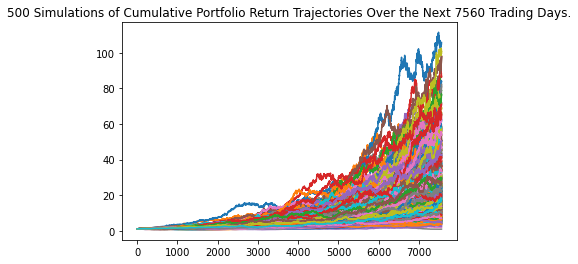

In [54]:
# Plot simulation outcomes
line_plot = MC_even_dist.plot_simulation()

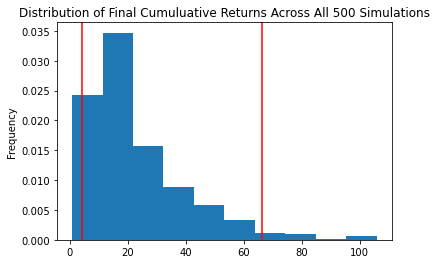

In [56]:
# Plot probability distribution and confidence intervals
dist_plot = MC_even_dist.plot_distribution()

### Retirement Analysis

In [57]:
# Fetch summary statistics from the Monte Carlo simulation results
sum_stats = MC_even_dist.summarize_cumulative_return()

# Print summary statistics
print(sum_stats)

count           500.000000
mean             22.809721
std              16.852400
min               0.894195
25%              11.089492
50%              17.981704
75%              29.057644
max             105.786146
95% CI Lower      4.249544
95% CI Upper     66.185914
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [58]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_l = round(sum_stats[8]*20000,2)
ci_u = round(sum_stats[9]*20000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_l} and ${ci_u}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $84990.87 and $1323718.28


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [60]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_l} and ${ci_u}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $84990.87 and $1323718.28


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [61]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_even_dist_five = MCSimulation(portfolio_data = df_stock_data, weights = [.40,.60], num_simulation = 500, num_trading_days = 252*5)
MC_even_dist_five.portfolio_data.head()

AGG                                                      \
              open     high       low    close     volume daily_return   
2017-05-10  108.60  108.660  108.4400  108.520  1427511.0          NaN   
2017-05-11  108.35  108.540  108.3435  108.515  1773499.0    -0.000046   
2017-05-12  108.81  108.940  108.7800  108.920  1136553.0     0.003732   
2017-05-15  108.85  108.940  108.8200  108.890  1620264.0    -0.000275   
2017-05-16  108.88  109.101  108.8800  109.000  1394153.0     0.001010   

               SPY                                                    
              open    high     low    close      volume daily_return  
2017-05-10     NaN     NaN     NaN      NaN         NaN          NaN  
2017-05-11  239.35  239.57  238.13  239.410  45435690.0          NaN  
2017-05-12  239.09  239.21  238.67  239.030  35283567.0    -0.001587  
2017-05-15  239.47  240.44  239.45  240.245  42230620.0     0.005083  
2017-05-16  240.62  240.67  239.63  240.100  37206183.0    -0.000604

In [62]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_even_dist_five.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.009297,0.998309,1.011517,1.009249,0.996872,0.999981,0.998545,0.998272,0.997514,1.003473,...,1.001409,0.996829,1.001502,0.999602,0.998669,1.001603,0.996878,0.995333,0.985655,1.008272
2,1.007581,1.000882,1.008067,1.005278,0.993881,1.001175,1.016011,1.010063,0.993823,1.013689,...,1.007930,0.984367,1.018332,1.002349,0.997530,0.993455,1.000045,0.992486,0.970237,1.022736
3,0.993867,1.000074,0.997610,1.005329,0.988542,1.006962,1.023877,1.013822,0.994284,1.027490,...,0.999111,1.006266,1.027070,0.986783,0.984895,0.997310,1.001046,0.994639,0.984233,1.021482
4,1.001038,0.993657,1.002048,1.009661,0.993475,1.010722,1.024449,1.023254,0.996839,1.022032,...,0.997775,1.010930,1.020645,0.985689,0.973518,0.985714,1.007322,1.003003,0.982373,1.033835
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.447752,2.890033,1.317825,1.322040,1.551507,1.197265,1.391304,1.479672,1.230109,1.784073,...,2.070902,1.040332,1.057154,1.863392,1.687538,1.185236,0.992744,2.375152,1.047471,1.852758
1257,1.423151,2.900167,1.306610,1.306096,1.544618,1.198151,1.398096,1.483760,1.235387,1.783407,...,2.072008,1.034685,1.071883,1.858982,1.671952,1.187821,0.992387,2.365722,1.043488,1.825600
1258,1.431969,2.870059,1.313634,1.292817,1.529900,1.184452,1.415343,1.484283,1.223014,1.808105,...,2.069875,1.013784,1.068630,1.838138,1.694625,1.192056,0.975433,2.312598,1.038363,1.857628
1259,1.421929,2.889001,1.308037,1.297354,1.526575,1.186867,1.415871,1.483740,1.230683,1.805712,...,2.101603,1.018290,1.067173,1.846306,1.685591,1.175840,0.990196,2.308777,1.048802,1.829374


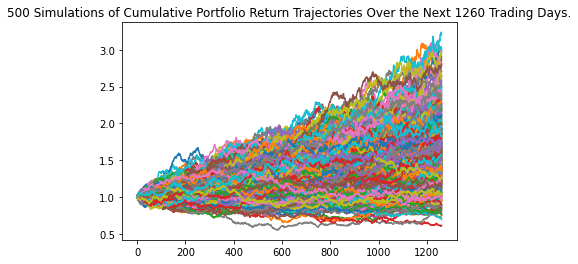

In [63]:
# Plot simulation outcomes
line_plot_five = MC_even_dist_five.plot_simulation()

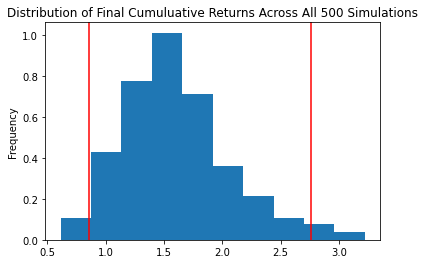

In [64]:
# Plot probability distribution and confidence intervals
dist_plot_five = MC_even_dist_five.plot_distribution()

In [65]:
# Fetch summary statistics from the Monte Carlo simulation results
sum_stats_five = MC_even_dist_five.summarize_cumulative_return()
# Print summary statistics
print(sum_stats_five)

count           500.000000
mean              1.598818
std               0.458649
min               0.614238
25%               1.299463
50%               1.548920
75%               1.852209
max               3.221753
95% CI Lower      0.855565
95% CI Upper      2.759049
Name: 1260, dtype: float64


In [67]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_l_five = round((sum_stats_five[8] * initial_investment), 2)
ci_u_five = round((sum_stats_five[9] * initial_investment), 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_l_five} and ${ci_u_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $51333.9 and $165542.93


### Ten Years Retirement Option

In [68]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# Forecast returns of slightly less risky portfolio allocation of 10% bonds and 90% stocks
MC_10yr = MCSimulation(
    portfolio_data=df_stock_data,
    weights=[.10, .90],
    num_simulation=500,
    num_trading_days=252*10
)

In [69]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_10yr.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.013083,1.001105,1.003893,1.007828,1.000193,1.003316,1.010369,1.001908,1.001822,1.009046,...,1.016009,1.003179,1.000165,1.001317,0.972122,1.016767,0.987792,1.014385,0.998796,1.019543
2,1.042350,1.007314,1.019825,1.003575,1.000249,0.995995,1.020078,1.012973,1.013146,1.001081,...,1.037151,1.001081,0.998465,1.019630,0.974286,1.012846,0.987333,1.013879,1.008735,1.033086
3,1.035116,1.010100,1.024131,0.997582,0.990613,1.013986,1.041718,1.017358,1.004931,1.015861,...,1.039269,1.000182,0.981308,1.021645,0.963378,0.999044,0.990203,1.010823,1.028141,1.033896
4,1.023397,0.998857,1.013101,0.984643,0.987875,1.017217,1.022764,1.036177,1.002033,1.002421,...,1.055373,0.997145,0.976884,0.999926,0.973318,0.999360,0.996502,1.007015,1.020107,1.053938
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,3.373998,3.920170,4.024849,4.377933,12.590632,5.503538,0.953460,2.981366,8.145944,7.172960,...,1.852780,1.161794,2.809593,5.504685,2.711713,3.150233,2.501408,4.659291,5.570715,1.897859
2517,3.326493,3.987833,3.989551,4.342193,12.216667,5.491649,0.958752,3.018127,8.090539,7.151351,...,1.842208,1.151870,2.856399,5.503534,2.706767,3.204728,2.494394,4.570676,5.526963,1.903811
2518,3.366795,3.959366,4.006360,4.316256,11.980991,5.527603,0.961254,2.922209,8.064951,7.011642,...,1.846404,1.157695,2.862059,5.460837,2.743967,3.184682,2.463591,4.495637,5.570280,1.892977
2519,3.385036,4.039580,4.004117,4.339410,12.010705,5.547900,0.971405,2.905727,8.066682,7.128544,...,1.840580,1.168038,2.865107,5.470963,2.697355,3.179262,2.456826,4.518630,5.470554,1.915339


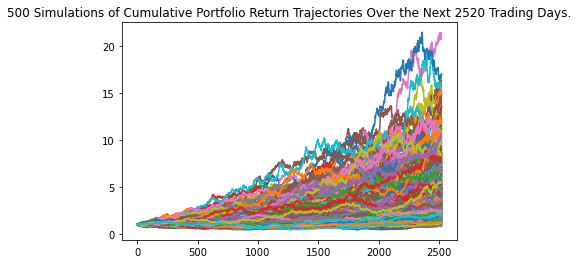

In [70]:
# Plot simulation outcomes
line_plot_10yr = MC_10yr.plot_simulation()

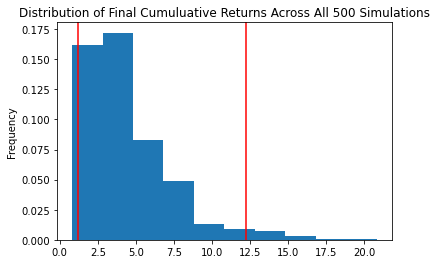

In [71]:
# Plot probability distribution and confidence intervals
distribution_plot_10yr = MC_10yr.plot_distribution()

In [72]:
# Fetch summary statistics from the Monte Carlo simulation results
summ_stats_10yr = MC_10yr.summarize_cumulative_return()

# Print summary statistics
print(summ_stats_10yr)

count           500.000000
mean              4.458761
std               2.876476
min               0.808843
25%               2.469613
50%               3.703073
75%               5.581040
max              20.800301
95% CI Lower      1.181560
95% CI Upper     12.213957
Name: 2520, dtype: float64


In [75]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round((summ_stats_10yr[8] * initial_investment), 2)
ci_upper_ten = round((summ_stats_10yr[9] * initial_investment), 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $70893.63 and $732837.4
